## 分类与 Logistic 回归

分类用来预测若干个离散值。目前我们仅关注二分分类 (binary classifcation) 即 y 只有两个值 0， 1。0，被称为负类 (negative class）； 1 被称为正类 (positive class)，或者有时被记为 "-" 和 “+” , 对于一个训练样本， 给定 $x^{(i)}$,  $y^{(i)}$ 也被称作为 label 标签。

Logistic 回归就是来预测二分类 0, 1 的一种回归学习算法。Logistic 回归与一般的线性回归主要不同是选择假设函数不一样。

### Logistic 回归

改变我们的 **hypothesis** 形式， $h_\theta(x) = g(\theta^Tx) = \frac{1}{1 + e^{-\theta^Tx}}$ , 即 $ g(z) = \frac{1}{1 + e^{-z}}$, $g(z)$  被称为 Logistic 函数或 Sigmoid 函数。 Sigmoid 函数有如下的性质: 

\begin{align*}
g'(z) &= \frac{d}{dz}(\frac{1}{1 + e^{-z}}) 
\\&= \frac{1}{1 + e^{-z}} e^{-z}
\\ &=\frac{1}{1 + e^{-z}} (1- \frac{1}{1 + e^{-z}})
\\ &= g(z)(1-g(z))
\end{align*}

给出样本的假设函数，怎样才能拟合出 $\theta$ 那？尝试用概率知识对参数 $\theta$ 进行极大似然估计。

在极大似然估计之前，让我们先写出样本的概率密度函数。固定 $\theta$, 在给出 $x^{(i)}$ 时， $y^{(i)}$  的离散概率分布为：

\begin{align*}
f(y^{(i)} = 0 \mid x^{(i)}; \theta) &= 1 - h_\theta(x)
\\
f(y^{(i)} = 1 \mid x^{(i)}; \theta) &= h_\theta(x)
\\
f(y^{(i)}\mid x^{(i)}; \theta) &= h_\theta(x)^ {y^{(i)}} (1 - h_\theta(x))^{1 - y^{(i)}}
\end{align*}

写出样本的联合概率函数:

\begin{equation*}
L(\theta) = L(Y\mid X; \theta) = \prod_{i=1}^{m} h_\theta(x)^ {y^{(i)}} (1 - h_\theta(x))^{1 - y^{(i)}}
\end{equation*}

则有：

\begin{equation*}
\ell(\theta) = \ln L(\theta) = \sum_{i=1}^{m} \ln h_\theta(x)^ {y^{(i)}} (1 - h_\theta(x))^{1 - y^{(i)}}
\end{equation*}

求出 $ \ell(\theta) $ 的**最大值**，我们可以使用**梯度上升**的方法来求得，即先随机初始化下 $\theta$ ，然后利用梯度上升更新规则 $\theta_j := \theta_j + \alpha \frac{\partial}{\partial{\theta_j}}\ell({\theta})$ 来更新  $\theta$。

我们需要求出 $\frac{\partial}{\partial{\theta_j}}\ell({\theta})$, 让我们假设仅有一个样本的情况，则：

\begin{align*}
\frac{\partial}{\partial{\theta_j}}\ell({\theta}) &=  \frac{\partial}{\partial{\theta_j}} \ln [h_\theta(x)^y(1-h_\theta(x))^(1-y)]
\\ &= \frac{\partial}{\partial{\theta_j}} [y \ln h_\theta(x) + (1-y) \ln (1 - h_\theta(x))]
\\ &= \frac{\partial}{\partial{\theta_j}} [y \ln g(\theta ^ Tx) + (1-y) \ln (1 - g(\theta ^ Tx))]
\\ &= [y \frac{1}{g(\theta ^ Tx)} - (1-y) \frac{1}{ (1 - g(\theta ^ Tx)}] \frac{\partial}{\partial{\theta_j}}g(\theta ^ Tx)
\\ &= [y \frac{1}{g(\theta ^ Tx)} - (1-y) \frac{1}{ (1 - g(\theta ^ Tx)}] g(\theta ^ Tx)(1 - g(\theta ^ Tx) \frac{\partial}{\partial{\theta_j}} \theta^Tx
\\ &= [y (1 - g(\theta ^ Tx) - (1-y)g(\theta ^ Tx)] x_j
\\ &= (y-h_\theta(x))x_j
\end{align*}

即有更新规则为:$\theta_j := \theta_j + \alpha (y^{(i)}-h_\theta(x^{(i)}))x_j^{(i)}$ 。看起来和我们的 LMS 类似，但是却不是同一个算法。因为现在我们的假设 $h_\theta(x^{(i)})$ 是一个非线性函数。但是更新规则的相似是巧合吗？ 我们将在 GLM 广义线性模型中讨论这个话题。

### 算法实现


In [223]:
'''
下面是一个仅有两特征的 Logistic Demo
'''
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
def loadDataset(file):
    fr = open(file)
    dataset = []
    labels = []
    for line in fr.readlines():
        lineNums = line.strip().split()
        labels.append(int(lineNums[-1]))
        dataset.append([1.0, float(lineNums[0]), float(lineNums[1])])
    return dataset, labels

# 计算 Sigmoid hypothesis value
def calcHypothesis(z):
    return 1 / (1 + np.exp(-z))

# 批量梯度上升算法      
def batchGradientAscend(dataset, labels, maxIter = 500, alpha = 0.001):
    dataset = np.mat(dataset)
    labels = np.mat(labels).transpose()
    m, n = dataset.shape
    weights = np.ones((n, 1))
    for i in range(maxIter):
        error = labels - calcHypothesis(dataset * weights) 
        weights = weights + alpha * dataset.T * error
    return weights

def plotLinear(dataset, labels, weights):
    dataset = np.mat(dataset)
    labels = np.array(labels)
    negLabelsIndices = labels == 0
    posLabelsIndices = labels == 1
    negLabels = dataset[negLabelsIndices]
    posLabels = dataset[posLabelsIndices]
    plt.scatter(negLabels[:, 1], negLabels[:, 2], marker='x')
    plt.scatter(posLabels[:, 1], posLabels[:, 2], marker='o')
    x = np.arange(-3.5, 3.5, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    plt.plot(x, np.squeeze(np.asarray(y)))
    plt.show()
    

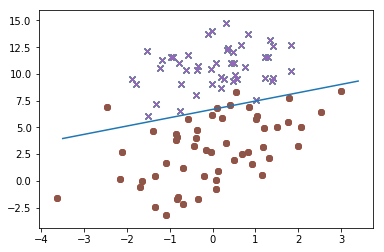

In [224]:
dataset, labels = loadDataset('./data/testSet.txt')
weights = batchGradientAscend(dataset, labels)
plotLinear(dataset, labels, weights)


In [164]:
labels = [1, 0, 1, 0, 1]
amat = np.mat(labels)
arr = np.array(labels)
print(amat, amat.shape)
print(arr, arr.shape)

[[1 0 1 0 1]] (1, 5)
[1 0 1 0 1] (5,)
